### 画像のクラスタリング

- https://arakan-pgm-ai.hatenablog.com/entry/2019/07/25/000000

/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



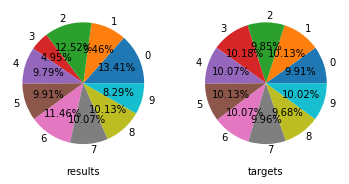

In [45]:
from sklearn import datasets
from sklearn import cluster
from matplotlib import pyplot as plt

# digitsデータのロード
digits = datasets.load_digits(n_class=10)
# KMeansクラスの生成
model = cluster.KMeans(n_clusters=10)
# 学習・クラスタリング実行
model.fit(digits.data)
# クラスタリング結果カウント用のリスト初期化
results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# グラフ表示ラベル用のリスト
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# グルーピング結果をカウントする
for v in model.labels_:
    results[int(v)] += 1
# 比較用に正解ラベルをカウントするリストの初期化
targets = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 比較用に正解ラベルをグループごとにカウントする
for v in digits.target:
    targets[int(v)] += 1

# グラフ表示のための設定（クラスタリング結果用）
plt.subplot(1, 2, 1)
plt.xlabel('results')
plt.pie(x=results, labels=labels, autopct='%.2f%%')

# グラフ表示設定（正解ラベルカウント用）
plt.subplot(1, 2, 2)
plt.xlabel('targets')
plt.pie(x=targets, labels=labels, autopct='%.2f%%')
# 結果表示
plt.show()

In [46]:
model = cluster.AgglomerativeClustering(n_clusters=10, linkage='complete')

In [47]:
model = cluster.AgglomerativeClustering(n_clusters=10, linkage='single')

- https://www.geeksforgeeks.org/k-means-clustering-on-the-handwritten-digits-data-using-scikit-learn-in-python/

In [48]:
from sklearn.datasets import load_digits
  
digits_data = load_digits().data

In [49]:
print(digits_data.shape, digits_data[0].shape)

(1797, 64) (64,)


First handwritten digit data: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


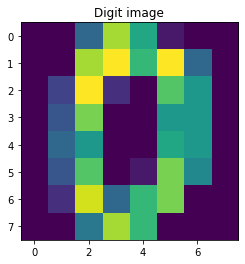

In [52]:
import matplotlib.pyplot as plt
  
print("First handwritten digit data: " + str(digits_data[0]))
sample_digit = digits_data[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

In [ ]:
from sklearn.preprocessing import scale
  
scaled_data = scale(digits_data)
print(scaled_data)
  
Y = load_digits().target
print(Y)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


In [ ]:
from sklearn.cluster import KMeans

k = 10
kmeans_cluster = KMeans(init = "random",
						n_clusters = k,
						n_init = 10,
						random_state = 0)


In [ ]:
kmeans_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)


In [ ]:
import time
import sklearn.metrics as metrics

def bench_k_means(estimator, name, data):
	initial_time = time.time()
	estimator.fit(data)
	print("Initial-cluster: " + name)
	print("Time taken: {0:0.3f}".format(time.time() - initial_time))
	print("Homogeneity: {0:0.3f}".format(
		metrics.homogeneity_score(Y, estimator.labels_)))
	print("Completeness: {0:0.3f}".format(
		metrics.completeness_score(Y, estimator.labels_)))
	print("V_measure: {0:0.3f}".format(
		metrics.v_measure_score(Y, estimator.labels_)))
	print("Adjusted random: {0:0.3f}".format(
		metrics.adjusted_rand_score(Y, estimator.labels_)))
	print("Adjusted mutual info: {0:0.3f}".format(
		metrics.adjusted_mutual_info_score(Y, estimator.labels_)))
	print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(
		data, estimator.labels_, metric='euclidean', sample_size=300)))


In [ ]:
kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=10, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)

kmeans_cluster = KMeans(init="k-means++", n_clusters=k,
						n_init=10, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)


Initial-cluster: random
Time taken: 0.192
Homogeneity: 0.739
Completeness: 0.748
V_measure: 0.744
Adjusted random: 0.666
Adjusted mutual info: 0.741
Silhouette: 0.186
Initial-cluster: random
Time taken: 3.367
Homogeneity: 0.742
Completeness: 0.751
V_measure: 0.747
Adjusted random: 0.669
Adjusted mutual info: 0.744
Silhouette: 0.192


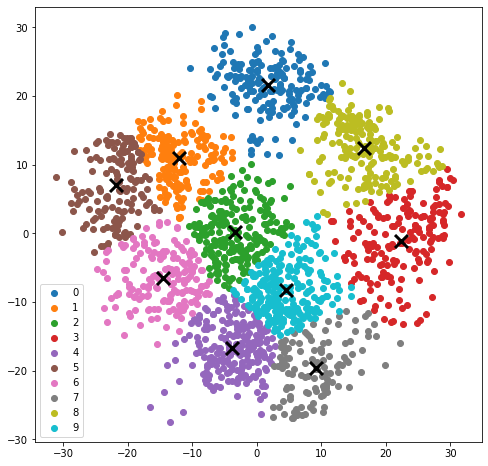

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)

# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
	plt.scatter(reduced_data[label == i, 0],
				reduced_data[label == i, 1],
				label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
			marker='x', s=169, linewidths=3,
			color='k', zorder=10)
plt.legend()
plt.show()


In [ ]:
reduced_data

array([[ -1.25946604,  21.27488477],
       [  7.95761089, -20.76868975],
       [  6.99192337,  -9.95599137],
       ...,
       [ 10.80128374,  -6.96026085],
       [ -4.87209896,  12.42396751],
       [ -0.34438991,   6.36553224]])

- plotly でクラスタリングを表現できる？

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)

# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    fig = px.scatter(x=reduced_data[label == i, 0],
				y= reduced_data[label == i, 1],
				color=i,
                )
px.scatter(x=centroids[:, 0], y=centroids[:, 1],
			# marker='x', s=169, linewidths=3,
			# color='k', zorder=10
            )
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'color' is of type str or int.

<Figure size 576x576 with 0 Axes>

- https://milliams.com/courses/applied_data_analysis/Clustering%20images.html

In [ ]:
from skimage import io

photo = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg/480px-Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg")

print("Shape is", photo.shape)
print("Size is", photo.size)

Shape is (480, 480, 3)
Size is 691200


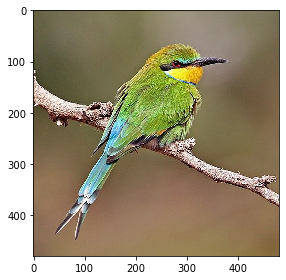

In [ ]:
io.imshow(photo)

In [ ]:
import numpy as np

photo = np.array(photo, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(photo.shape)  # Get the current shape
image_array = np.reshape(photo, (w * h, d))  # Reshape to to 2D

In [ ]:
from pandas import DataFrame

pixels = DataFrame(image_array, columns=["Red", "Green", "Blue"])

In [ ]:
from matplotlib import colors

pixels["colour"] = [colors.to_hex(p) for p in image_array]

In [ ]:
pixels_sample = pixels.sample(frac=0.05)

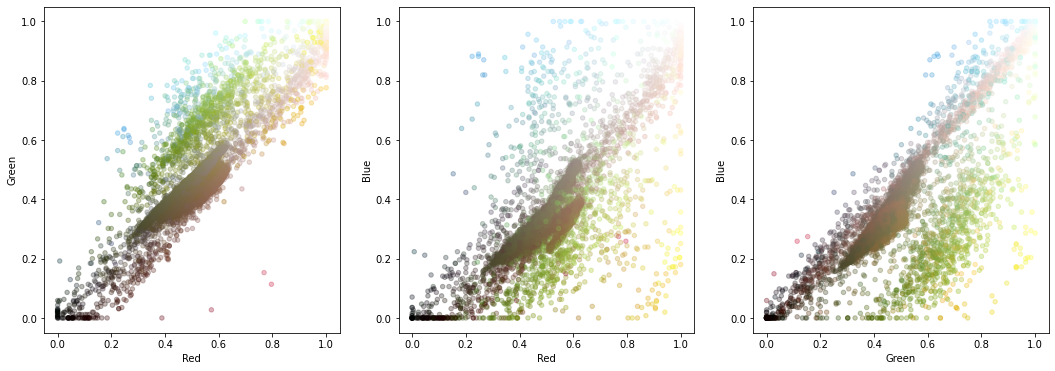

In [ ]:
import matplotlib.pyplot as plt


def plot_colours(df, c1, c2, c3):
    """
    Given a DataFrame and three column names,
    plot the pairs against each other
    """
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    df.plot.scatter(c1, c2, c=df["colour"], alpha=0.3, ax=ax[0])
    df.plot.scatter(c1, c3, c=df["colour"], alpha=0.3, ax=ax[1])
    df.plot.scatter(c2, c3, c=df["colour"], alpha=0.3, ax=ax[2])


plot_colours(pixels_sample, "Red", "Green", "Blue")

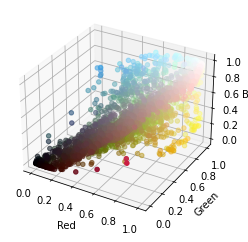

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.scatter(pixels_sample["Red"], pixels_sample["Green"], pixels_sample["Blue"], c=pixels_sample["colour"])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(pixels_sample[["Red", "Green", "Blue"]])

/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



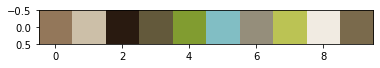

In [ ]:
plt.imshow([kmeans.cluster_centers_])

In [ ]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels


array([3, 3, 3, ..., 9, 9, 9], dtype=int32)

In [ ]:
reduced = np.array([kmeans.cluster_centers_[p] for p in labels]).reshape(original_shape)

Text(0.5, 1.0, 'RGB clustered')

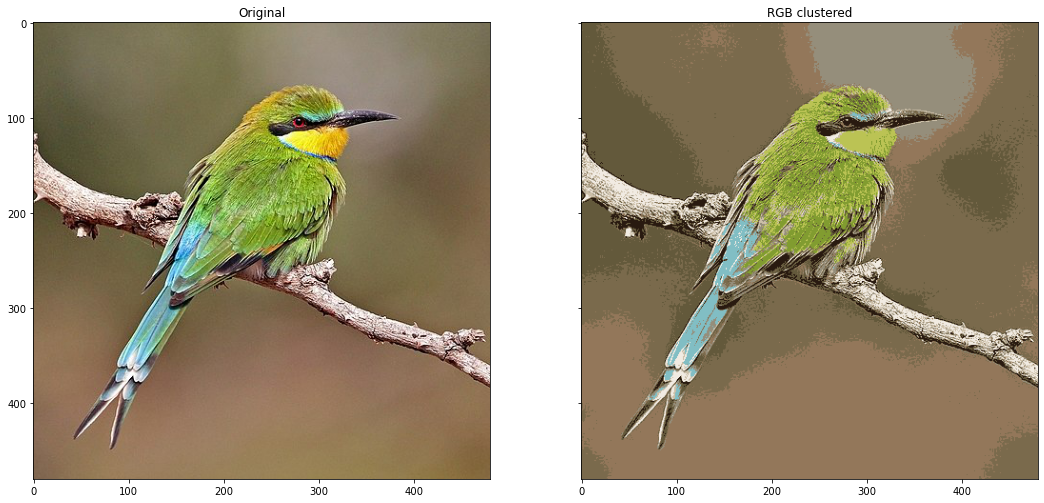

In [ ]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")

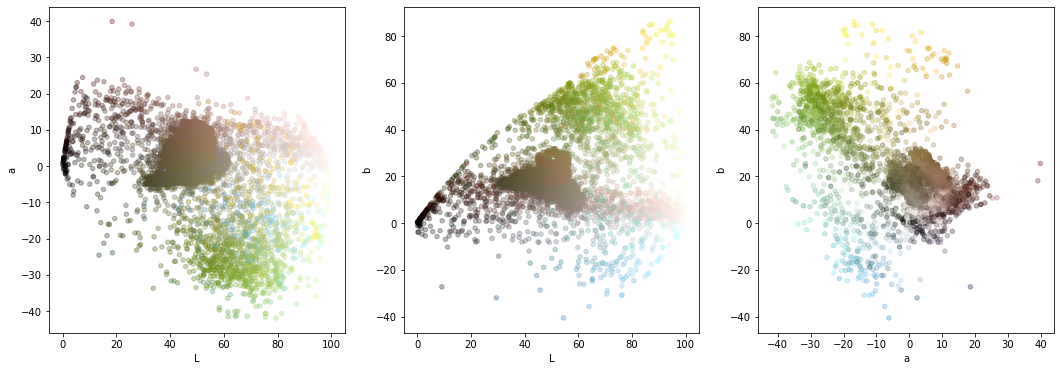

In [ ]:
from skimage.color import rgb2lab, lab2rgb

photo_lab = rgb2lab(photo)  # This is where we convert colour space
w, h, d = original_shape = tuple(photo_lab.shape)
image_array_lab = np.reshape(photo_lab, (w * h, d))

pixels_lab = DataFrame(image_array_lab, columns=["L", "a", "b"])

pixels_lab["colour"] = [colors.to_hex(p) for p in image_array]
pixels_sample_lab = pixels_lab.sample(frac=0.05)

plot_colours(pixels_sample_lab, "L", "a", "b")

/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



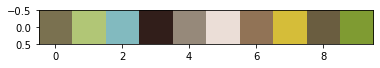

In [ ]:
kmeans_lab = KMeans(n_clusters=10).fit(pixels_sample_lab[["L", "a", "b"]])
plt.imshow(lab2rgb([kmeans_lab.cluster_centers_]))


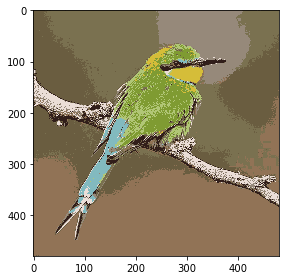

In [ ]:
labels_lab = kmeans_lab.predict(pixels_lab[["L", "a", "b"]])  # Assign pixels to the cluster centre
centers_lab = lab2rgb([kmeans_lab.cluster_centers_])[0]  # Get the RGB of the cluster centres
reduced_lab = np.array([centers_lab[p] for p in labels_lab]).reshape(original_shape)  # Map and reshape
io.imshow(reduced_lab)

Text(0.5, 1.0, 'Lab clustered')

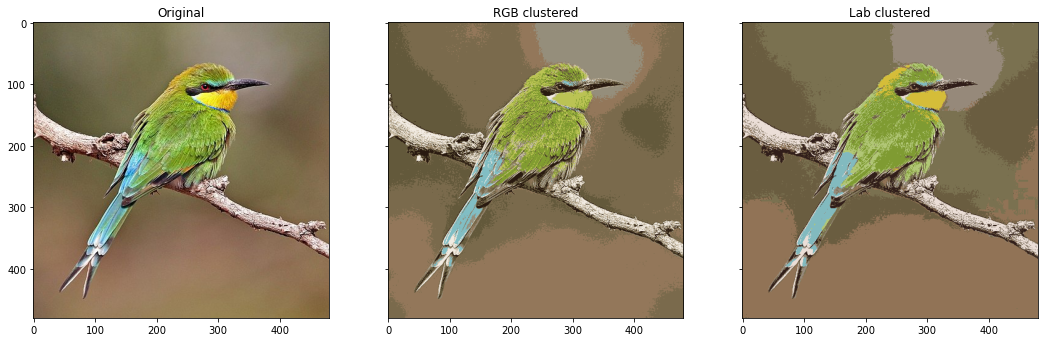

In [ ]:
f, axarr = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")
axarr[2].imshow(reduced_lab)
axarr[2].set_title("Lab clustered")

- https://zenn.dev/a5chin/articles/pytorch_mnist

In [54]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
root = "./data"

# 画像にどの様な変形を加えるか
transform = transforms.Compose([
    #Tensor型に
    transforms.ToTensor()
])

dataset = MNIST(
    # データセットのパス
    root=root,
    train=True,
    # ダウンロードしている場合はdownload=False
    download=True,
    transform=transform
)

dataloader = DataLoader(
    dataset=dataset, 
    batch_size=64,
    # シャッフルしない場合はshuffle=Flase
    shuffle=True,
    # batch_sizeを固定
    drop_last=True
)

/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning:

Failed to load image Python extension: dlopen(/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <CAE66874-17C2-35C9-9C4D-6BA9770AF17F> /Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <43816F8F-B81C-3A93-8BD8-33AA33E93629> /Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib



In [57]:
import cv2
img = dataloader[0][0].squeeze()
img = np.array(img)[0][0]

cv2.imshow(f"{label.item()}", img)
cv2.waitKey(0)

TypeError: 'DataLoader' object is not subscriptable